In [ ]:
import pandas as pd
#import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import scipy
import sklearn
import copy
from tabulate import tabulate

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/'
DATASET_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/'
Baseline_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/Baselines/'
Aggregate_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/RngRemake/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time

#csvName = '14456d07da6db5da228beff3ad356f824e4cd09a8d6771089eb26a862526ac9a'
#csvName = 'cd05d7b4445349ee645ea290586fd28c0c675a155eb1522485535c5c0329a908'
csvName = '36bc568292ec360f9cc2f4431fa0db953ce8714cdb1b165f4ec68ca54e7fe2be'

multiSeriesMain = pd.read_csv(DATA_PATH+csvName+'.csv')
multiSeriesMain = multiSeriesMain.loc[:, ~multiSeriesMain.columns.str.contains('^Unnamed')].astype(float).reset_index(drop=True)

csvName = 'Bogo'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bogoArray = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = 'Bubble'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bubbleArray = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

csvName = 'Bogo2'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bogoArray2 = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = 'Bubble2'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bubbleArray2 = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

csvName = 'bogocd05'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bogoArray3 = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = 'bubblecd05'
csvArray = pd.read_csv(Baseline_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bubbleArray3 = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

In [ ]:
csvName = '24HourBogo5min5Clust'
csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bogoArrayClust = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = '24HourBubble5min5Clust'
csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bubbleArrayClust = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = '24HourBogo15min10Clust'
csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bogoArrayClust2 = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
csvName = '24HourBubble15min10Clust'
csvArray = pd.read_csv(Aggregate_DATA_PATH+csvName+'.csv', header=None, usecols=[0,1,2,])
bubbleArrayClust2 = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

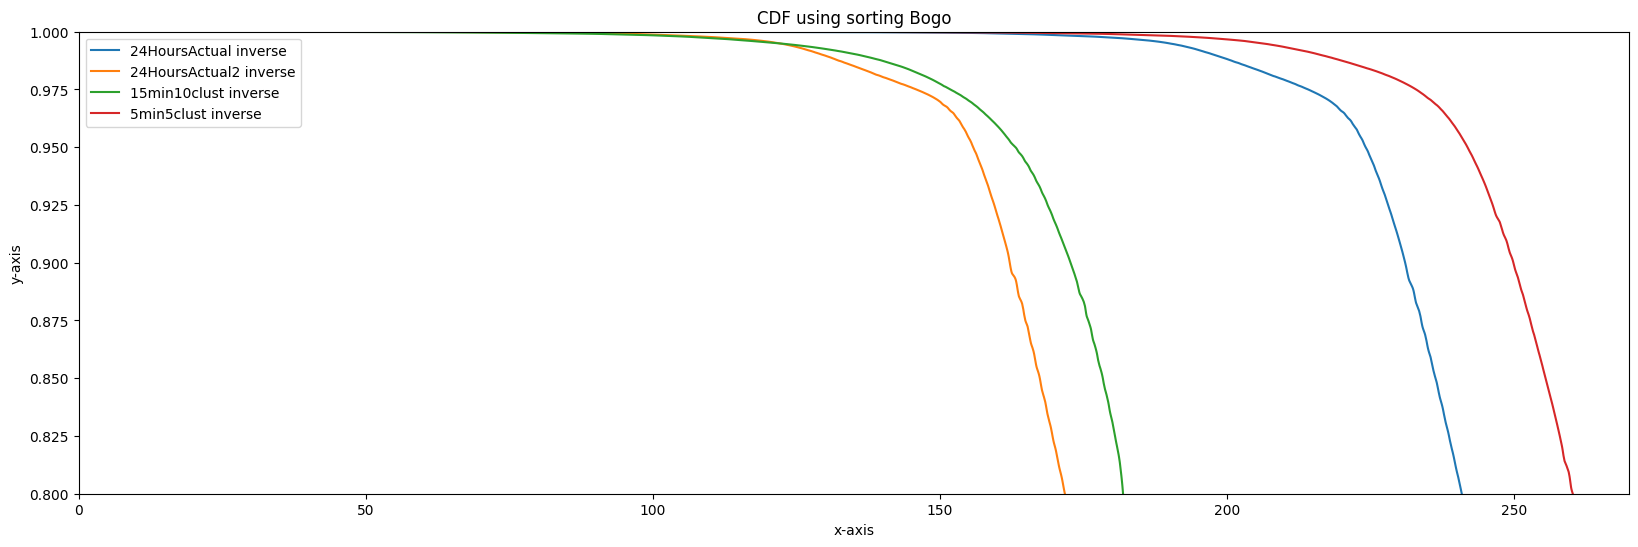

In [ ]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF using sorting Bogo')
percentile = 0

for data in [[bogoArray[2][bogoArray[2].ge(bogoArray[2].quantile(percentile))], '24HoursActual'],[bogoArray2[2][bogoArray2[2].ge(bogoArray2[2].quantile(percentile))], '24HoursActual2'], [bogoArrayClust[2][bogoArrayClust[2].ge(bogoArrayClust[2].quantile(percentile))], '15min10clust'], [bogoArrayClust2[2][bogoArrayClust2[2].ge(bogoArrayClust2[2].quantile(percentile))], '5min5clust']]:

  x = np.sort(data[0])


  N = len(data[0])


  # get the cdf values of y
  y = np.arange(N) / float(N)
  # plotting

  #plt.plot(x, y, label=data[1])
  plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
plt.axis([0, 270, 0.8, 1])
plt.legend()

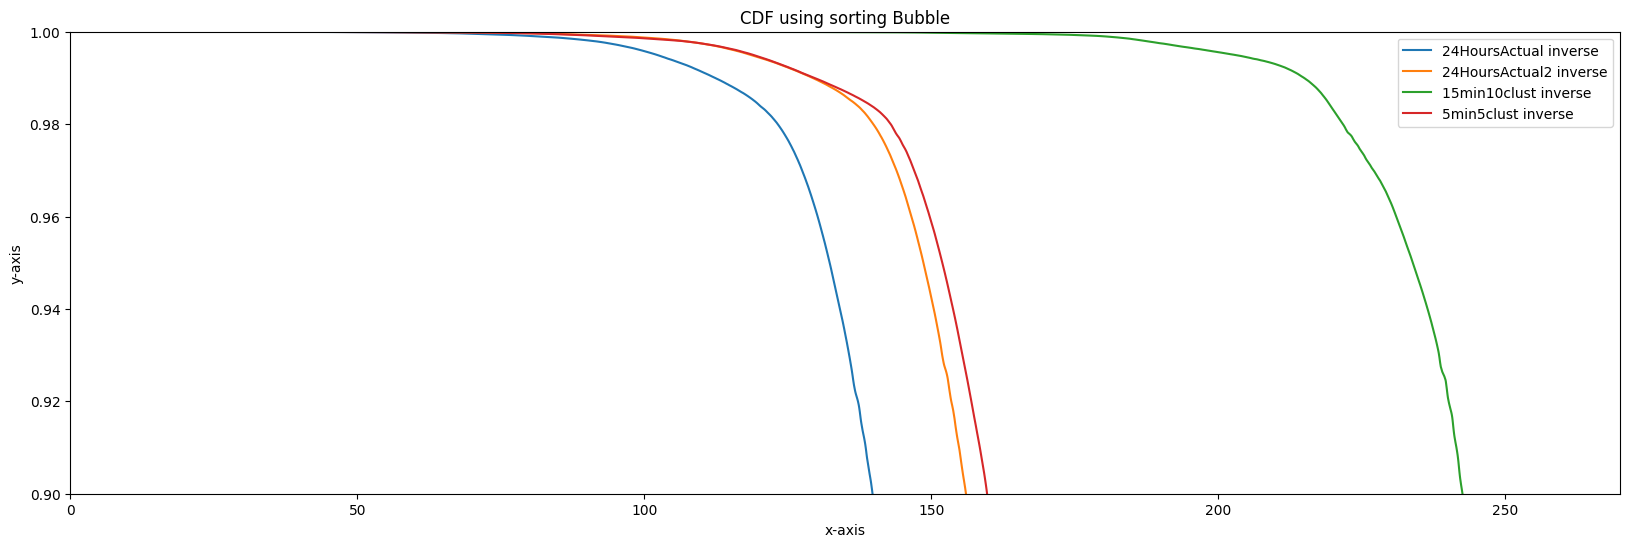

In [ ]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF using sorting Bubble')

for data in [[bubbleArray[2][bubbleArray[2].ge(bubbleArray[2].quantile(percentile))], '24HoursActual'], [bubbleArray2[2][bubbleArray2[2].ge(bubbleArray2[2].quantile(percentile))], '24HoursActual2'], [bubbleArrayClust[2][bubbleArrayClust[2].ge(bubbleArrayClust[2].quantile(percentile))], '15min10clust'], [bubbleArrayClust2[2][bubbleArrayClust2[2].ge(bubbleArrayClust2[2].quantile(percentile))], '5min5clust']]:

  x = np.sort(data[0])


  N = len(data[0])


  # get the cdf values of y
  y = np.arange(N) / float(N)
  # plotting

  #plt.plot(x, y, label=data[1])
  plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
plt.axis([0, 270, 0.9, 1])
plt.legend()

In [ ]:
# Chi squared
percentile = 0.5
obsArray = bogoArrayClust2[2][bogoArrayClust2[2].ge(bogoArrayClust2[2].quantile(percentile))]
expArray = bogoArray[2][bogoArray[2].ge(bogoArray[2].quantile(percentile))]
nExp = len(expArray)
nObs = len(obsArray)
exp, bin_edges = np.histogram(expArray, bins='fd')
temp_edge = 0
obs = []
skip = True
skip2 = True
for edge in bin_edges:
  if skip:
    skip = False
  elif skip2:
    obs.append(len(obsArray[(obsArray <= edge) & (obsArray > 0)])/nObs)
    skip2 = False
  else:
    obs.append(len(obsArray[(obsArray <= edge) & (obsArray > temp_edge)])/nObs)
  temp_edge = edge
exp2 = []
for e in range(len(exp)):
  exp2.append(exp[e]/nExp)
print(exp2)
print(obs)
print(sum(exp2), sum(obs))


print(scipy.stats.chisquare(obs, f_exp=exp2))

[0.06322865590640744, 0.06088481080704066, 0.05263732961839985, 0.04128593769848626, 0.03151779484433639, 0.025014804837369557, 0.01914219724737431, 0.014844617496838143, 0.012198708630988136, 0.009973143110068696, 0.008966971090720702, 0.008878659208158002, 0.007681012176166559, 0.007358793145194547, 0.006819905020968105, 0.008039298522539554, 0.006869497579644456, 0.006840325486305426, 0.006124017994407975, 0.00769904583386705, 0.006854381131277868, 0.006285260110318249, 0.005738681161484244, 0.0071232947916940155, 0.007004219610701066, 0.005851921923809387, 0.0052491203950856165, 0.006417860534586566, 0.007905902495725625, 0.0057137522817218, 0.004984715149094591, 0.004832489862034562, 0.008207966262208852, 0.0065923626929236725, 0.005217031092412683, 0.00385071632075194, 0.006386301633610707, 0.00857076102300697, 0.00507700504438534, 0.004171344146632732, 0.0025499061586797453, 0.004301822964112756, 0.007762959238364379, 0.006816722610785666, 0.007024640076038387, 0.006188196599753

ValueError: ignored

In [ ]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF using sorting Bubble')
percentile = 0

obs = pd.DataFrame(obs)
exp2 = pd.DataFrame(exp2)
tempY = "bleh"
for data in [[obs[obs.ge(obs.quantile(percentile))], '24HoursActual'], [exp2[exp2.ge(exp2.quantile(percentile))], '6hour5min5Clust']]:

  x = np.sort(data[0])


  N = len(data[0])

  # get the cdf values of y
  y = np.arange(N) / float(N)
  # plotting
  if tempY == 'bleh':
    print(scipy.special.smirnov(N, (y-tempY)))
    plt.plot()
  else:
    tempY = y
  #plt.plot(x, y, label=data[1])
plt.legend()

In [ ]:
import math
percentile = 0

for data in [[bubbleArray[2][bubbleArray[2].ge(bubbleArray[2].quantile(percentile))], '24HoursActual'], [bubbleArrayClust[2][bubbleArrayClust[2].ge(bubbleArrayClust[2].quantile(percentile))], '6hour5min5Clust'], [bubbleArrayClust2[2][bubbleArrayClust2[2].ge(bubbleArrayClust2[2].quantile(percentile))], '6hours15min5Clust'], [bubbleArrayClust3[2][bubbleArrayClust3[2].ge(bubbleArrayClust3[2].quantile(percentile))], '6hours15min10Clust']]:

  x = np.sort(data[0])


  N = len(data[0])


  # get the cdf values of y
  y = np.arange(N) / float(N)
  # plotting

  plt.hist(x, 50)
plt.legend()

In [ ]:
bins = np.linspace(0, 100, 5+1)
binned, binx, biny = np.histogram2d(x, x2, bins = [bins, bins])
print(binned,binx,biny)
#print(scipy.stats.chisquare(np.histogram(x2, bins=100), np.histogram(x, bins=100)))

In [ ]:
#print(scipy.stats.ttest_rel(x,x2))
print(scipy.stats.norm.interval(0.95, sum(x)/len(x), np.std(x)))
print(scipy.stats.norm.interval(0.95, sum(x2)/len(x2), np.std(x2)))
#print(scipy.stats.f_oneway(x2,x))
print(np.var(x), np.var(x2))
print(scipy.stats.ttest_ind(x, x2, equal_var = False))

In [ ]:

# defining the libraries
%matplotlib inline

numBins = 100
# initializing random values
data = bubbleArray[2]

# getting data of the histogram
count, bins_count = np.histogram(data, bins=numBins)

data2 = bubbleArray2[2]

count2, bins_count2 = np.histogram(data2, bins=numBins)

data3 = bubbleArray3[2]

count3, bins_count3 = np.histogram(data3, bins=numBins)

N = len(data)
N2 = len(data2)
N3 = len(data3)

# finding the PDF of the histogram using count values
pdf = count / sum(count)

pdf2 = count2 / sum(count2)
pdf3 = count3 / sum(count3)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
cdf2 = np.cumsum(pdf2)
cdf3 = np.cumsum(pdf3)

# plotting PDF and CDF
#plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="36bc")
plt.plot(bins_count2[1:], cdf2, color="green", label="1445")
plt.plot(bins_count2[1:], cdf3, color="red", label="cd05")
plt.legend()

In [ ]:
x = np.sort(data)
x2 = np.sort(data2)
x3 = np.sort(data3)
# get the cdf values of y
y = np.arange(N) / float(N)
y2 = np.arange(N2) / float(N2)
y3 = np.arange(N3) / float(N3)
# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.title('CDF using sorting the data')

plt.plot(x, y, marker='o')
plt.plot(x2, y2, marker='^')
plt.plot(x3, y3, marker='x')

In [ ]:
plt.hist(data, bins=numBins)